# 1. Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import pickle
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Import California Housing Dataset

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
print(housing.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


# 3. Data Preprocessing

In [6]:
df = pd.DataFrame(housing.data)
df.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
df.columns = housing.feature_names

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df['Price'] = housing.target

In [10]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
# Show overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
# Show the descriptive statistics of the data
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


MedInc        0.0
HouseAge      0.0
AveRooms      0.0
AveBedrms     0.0
Population    0.0
AveOccup      0.0
Latitude      0.0
Longitude     0.0
Price         0.0
dtype: float64


<Axes: >

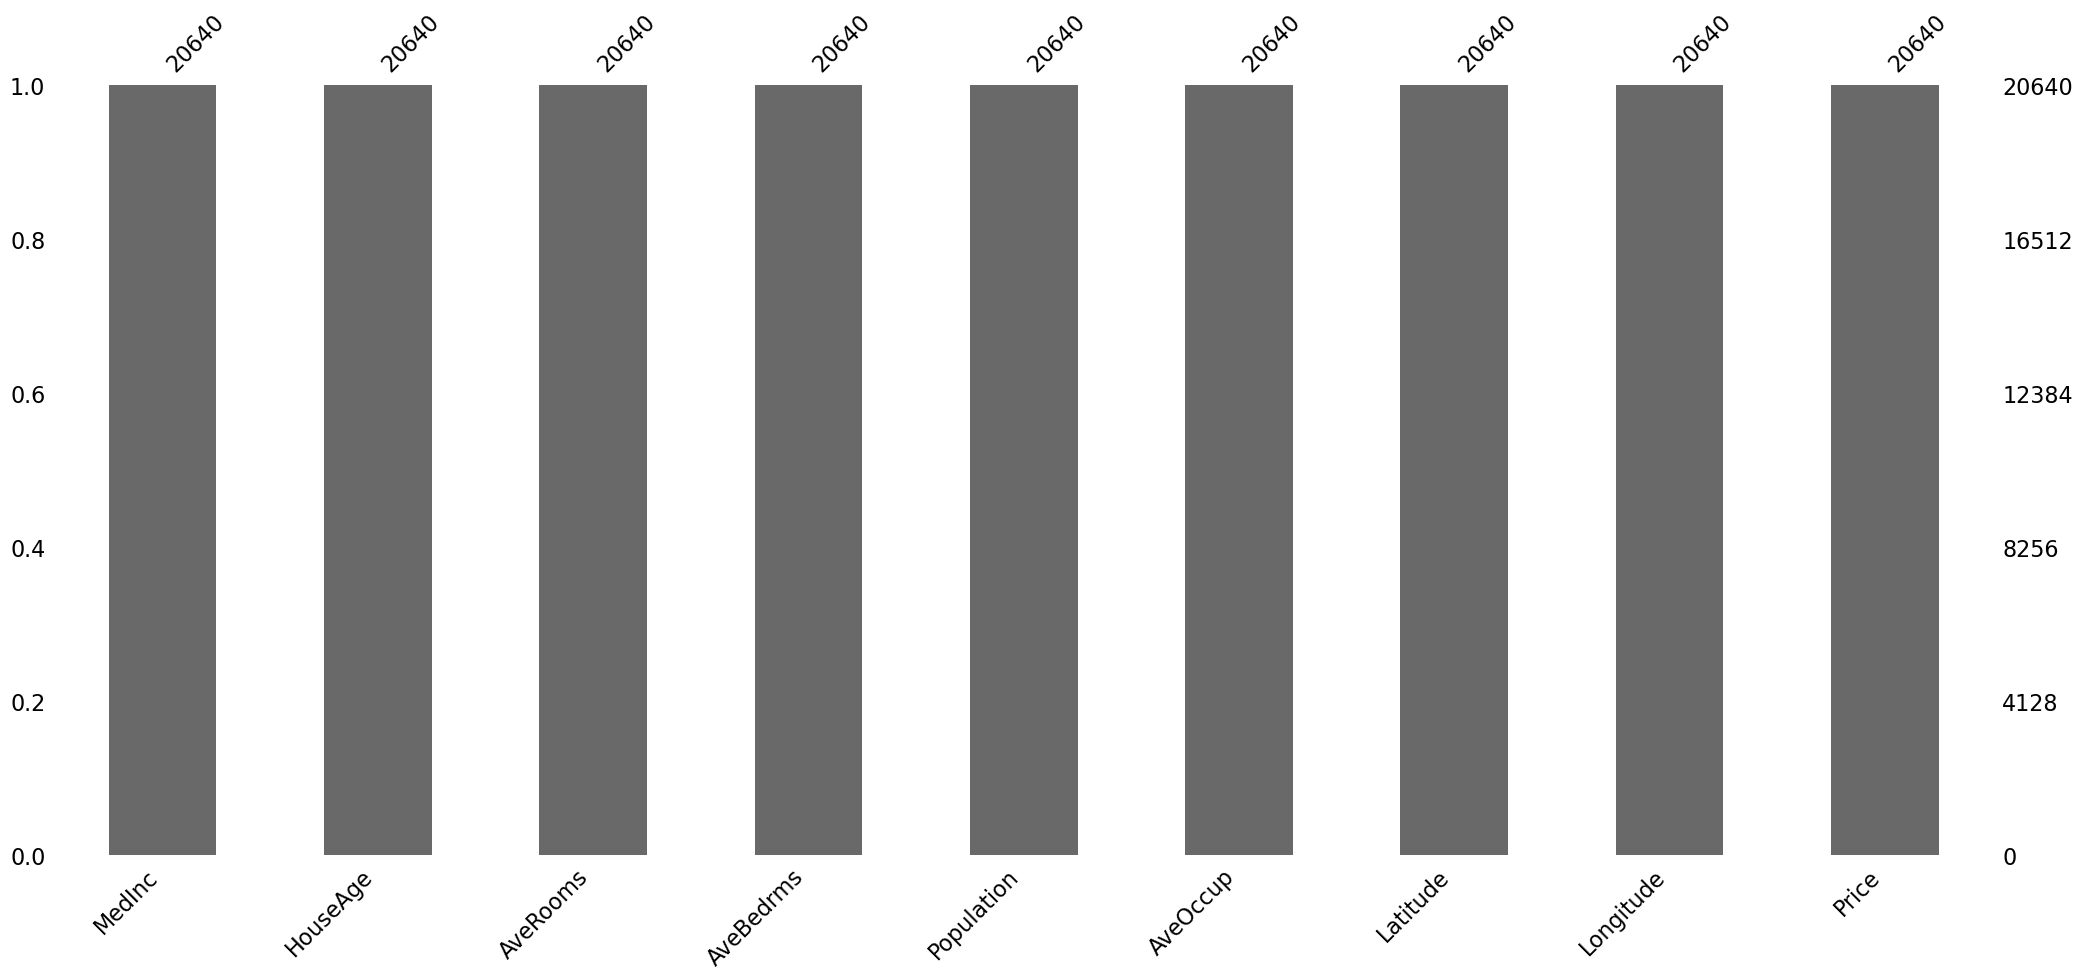

In [13]:
# Check missing values
def nan_percentage(df):
    nan_percentage = (df.isna().sum()/len(df))*100
    return nan_percentage
print(nan_percentage(df))
msno.bar(df)

# 4. Exploratory Data Analysis

In [14]:
# Correlation Check
df_corr = df.corr()
df_corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

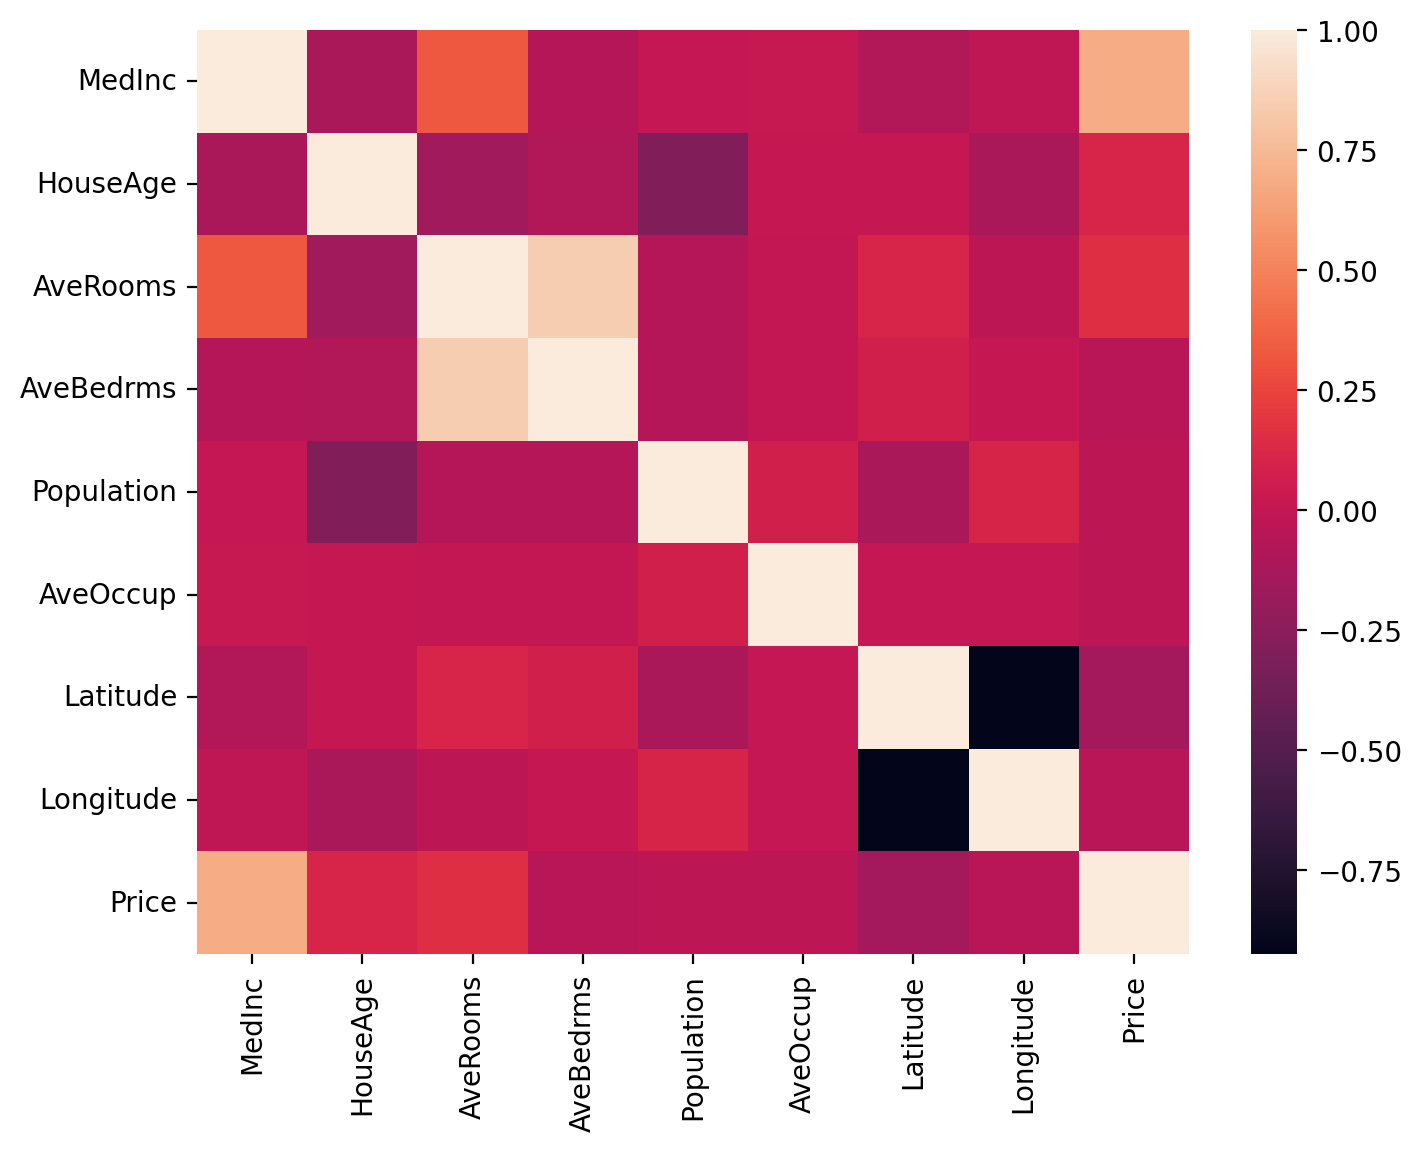

In [15]:
plt.figure(figsize=(8,6), dpi=200)
sns.heatmap(df_corr)

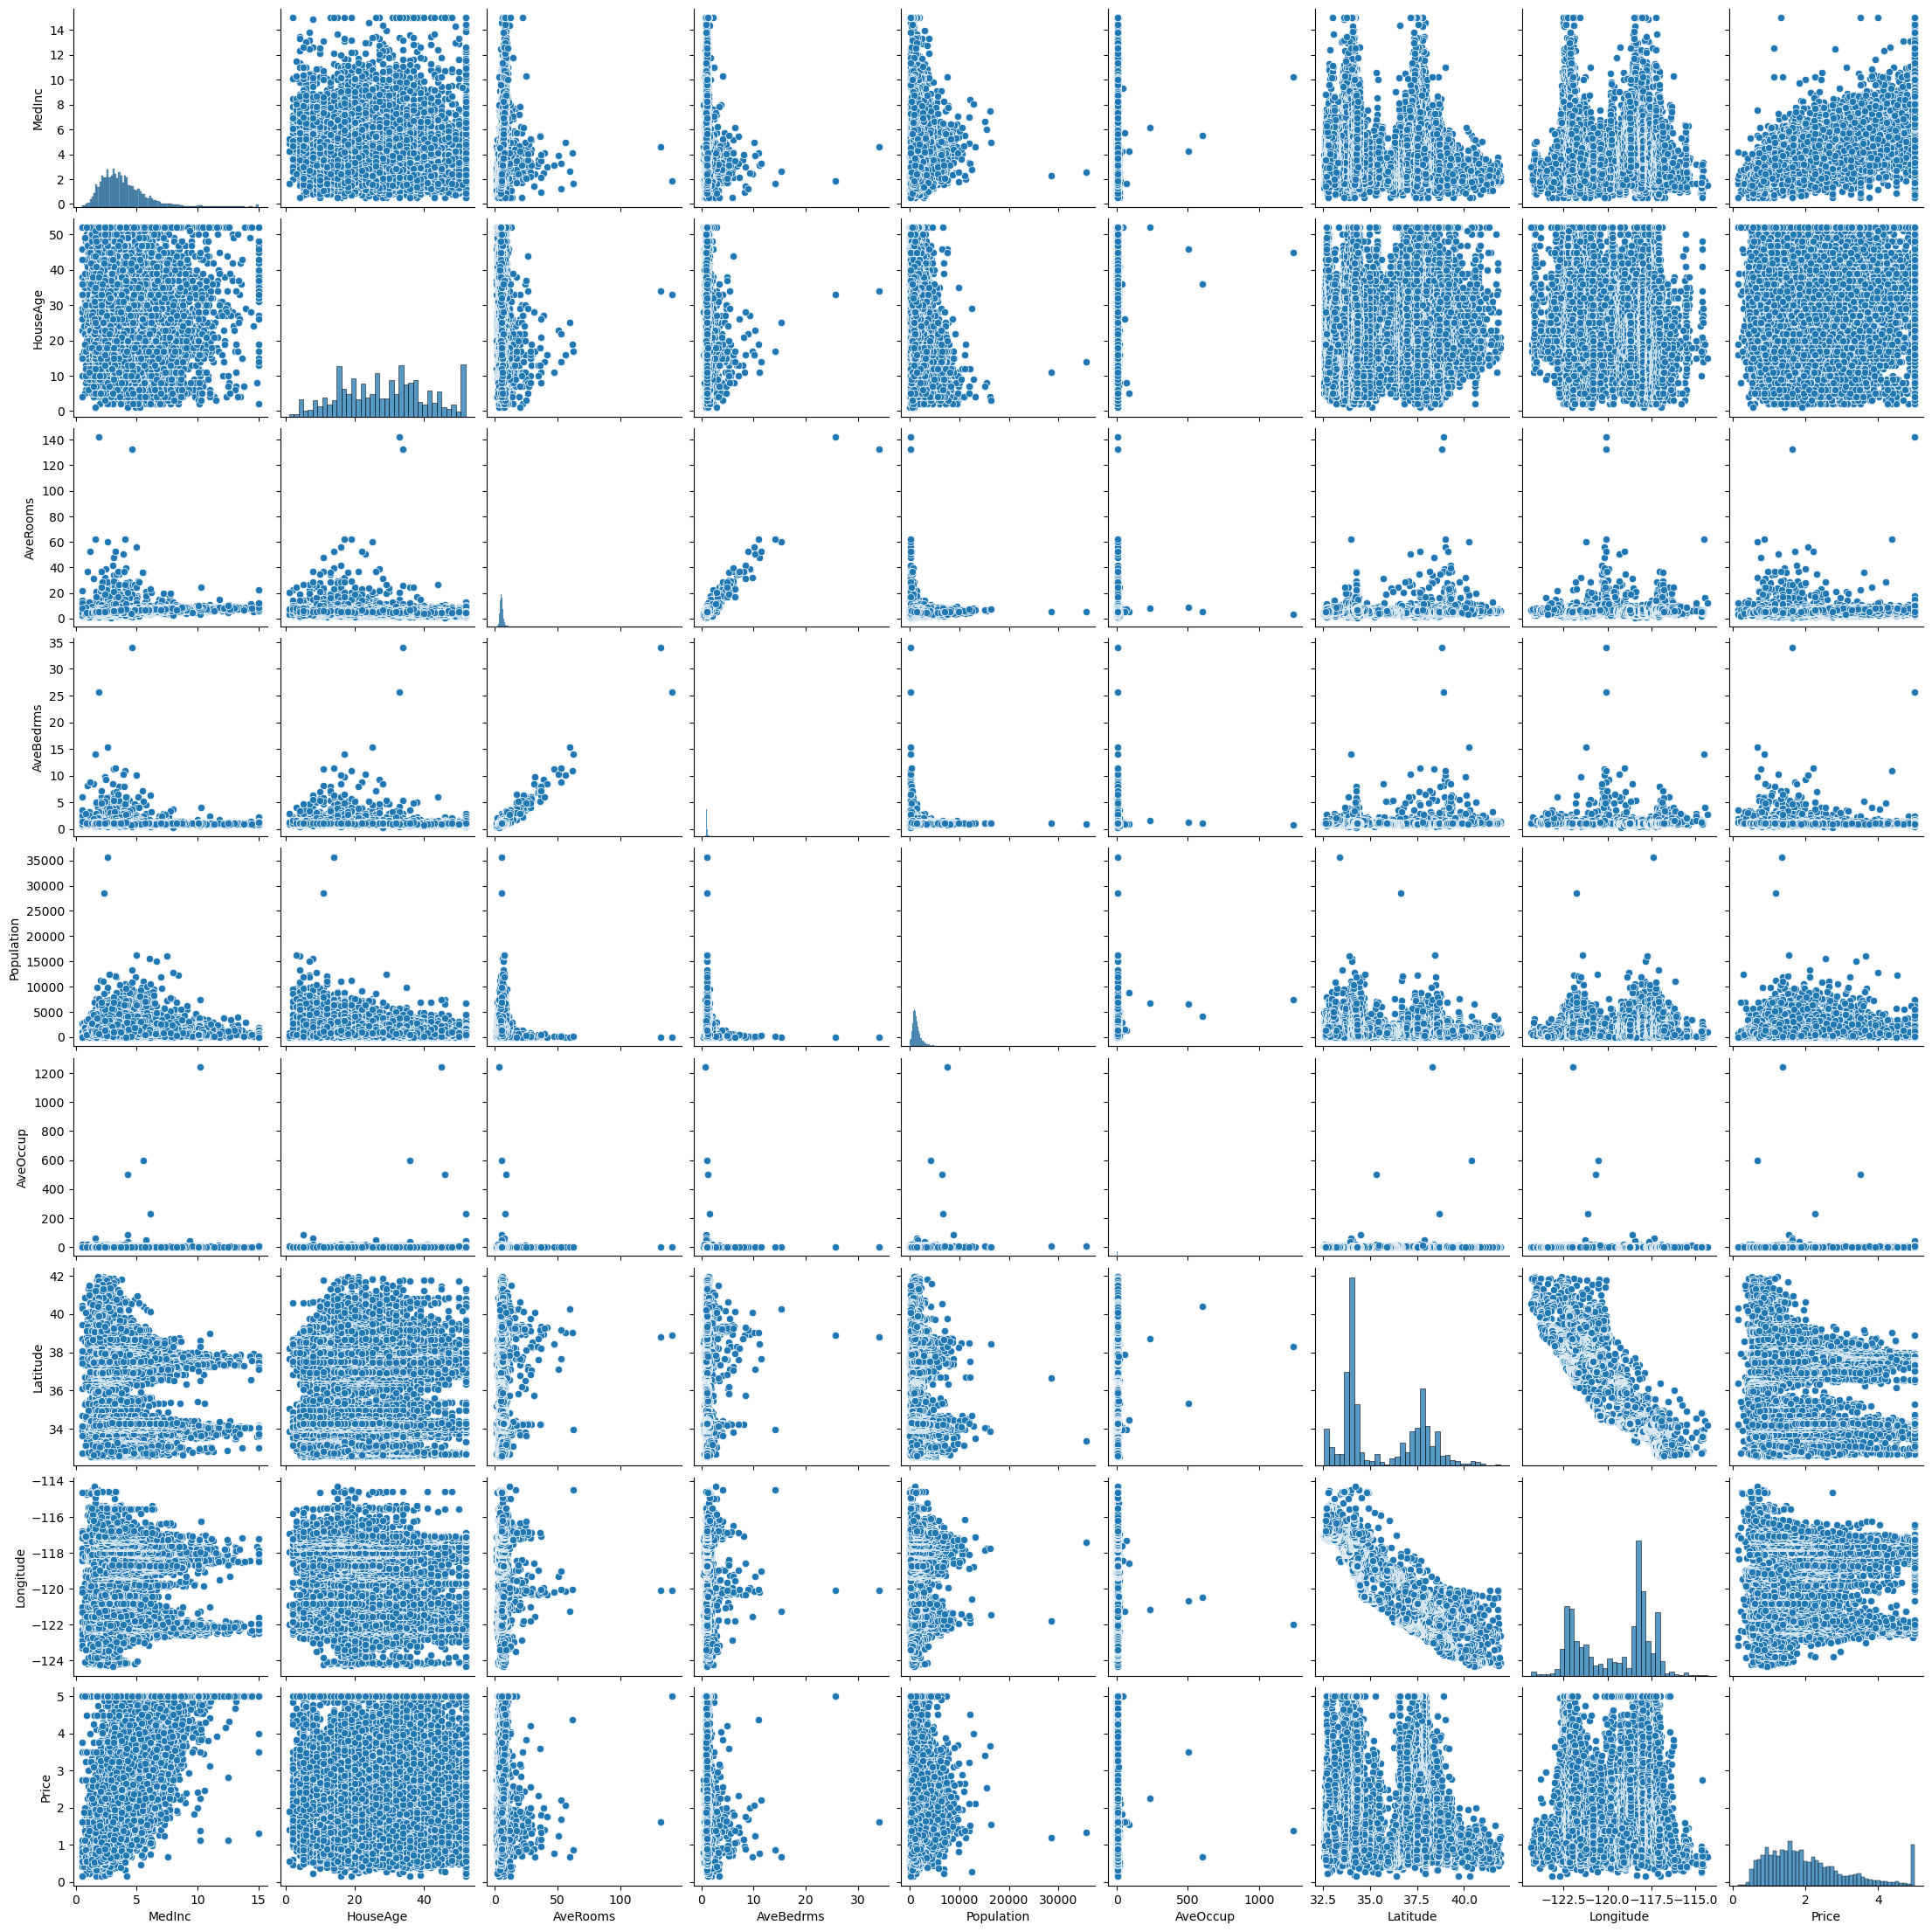

In [16]:
sns.pairplot(df)

Text(0.5, 0, 'Price')

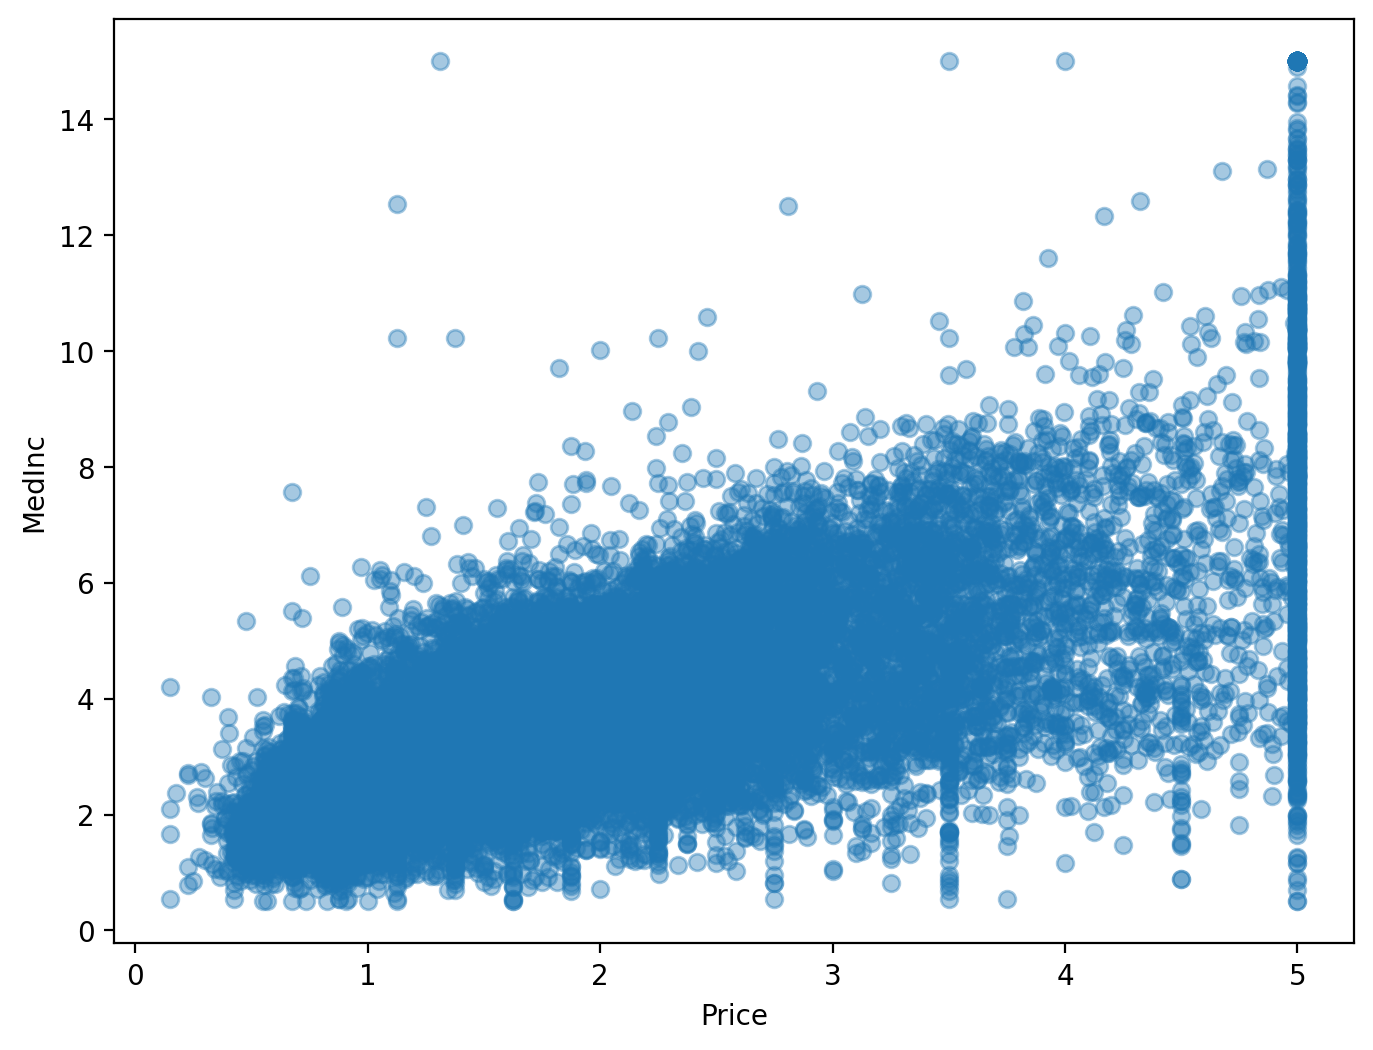

In [17]:
plt.figure(figsize=(8,6), dpi=200)
plt.scatter(df['Price'], df['MedInc'], alpha=0.4)
plt.ylabel('MedInc')
plt.xlabel('Price')

Text(0.5, 0, 'Price')

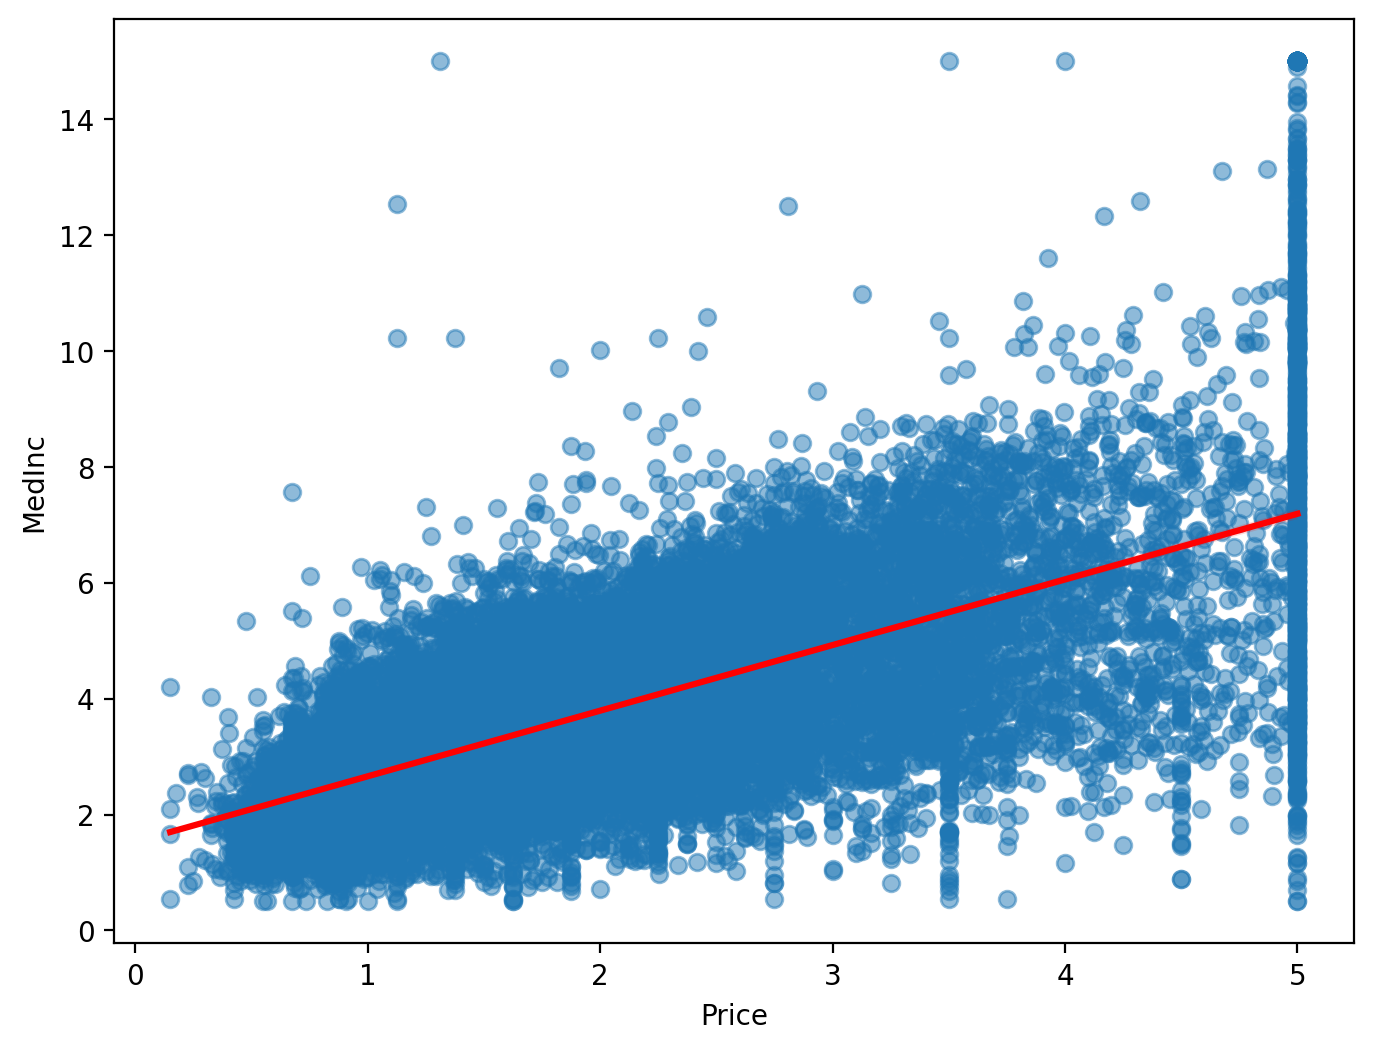

In [18]:
plt.figure(figsize=(8,6), dpi=200)
sns.regplot(x='Price', y='MedInc', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.ylabel('MedInc')
plt.xlabel('Price')

# 5. Data Preparation

In [19]:
## Dataset Splitting (Independent and Dependent Features)

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [21]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [22]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

In [24]:
## Standardize the dataset
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [25]:
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

# 6. Model Training

In [26]:
## Train Linear Regression Model
ln = LinearRegression()
ln.fit(X_train, y_train)

LinearRegression()

In [27]:
print(ln.coef_)

[ 8.49221760e-01  1.22119309e-01 -2.99558449e-01  3.48409673e-01
 -8.84488134e-04 -4.16980388e-02 -8.93855649e-01 -8.68616688e-01]


In [28]:
print(ln.intercept_)

2.0692396089424165


In [29]:
y_pred = ln.predict(X_test)
y_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

Text(0, 0.5, 'Y Pred')

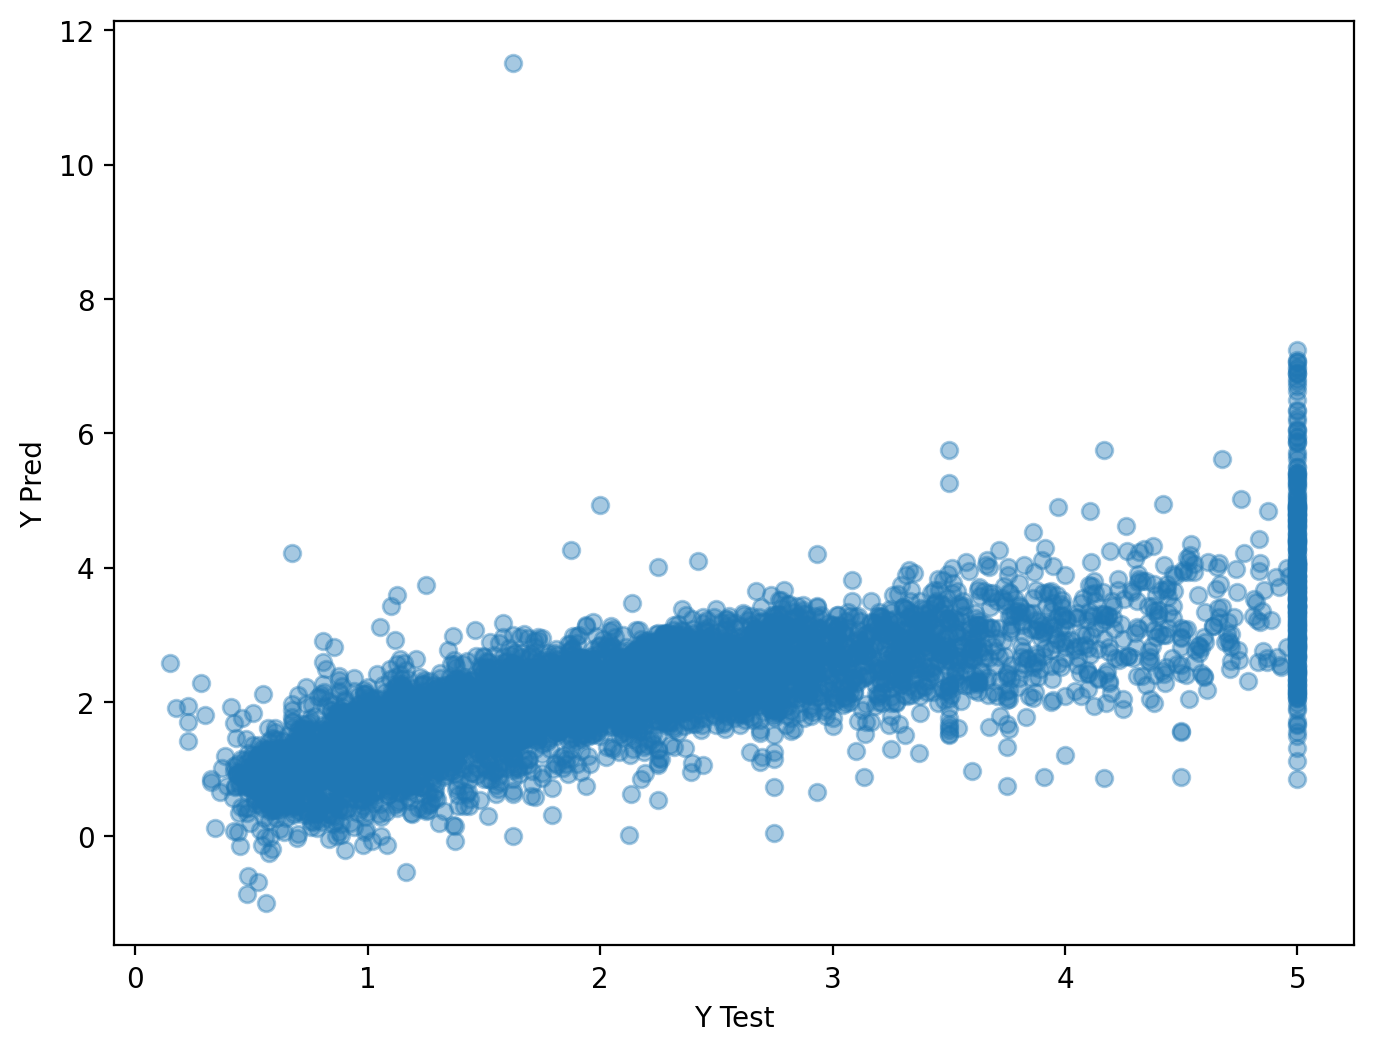

In [30]:
plt.figure(figsize=(8,6), dpi=200)
plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel('Y Test')
plt.ylabel('Y Pred')

In [31]:
residuals = y_test - y_pred
residuals

20046   -0.249049
3024    -1.309434
15663    2.289088
20484   -0.649147
9814     0.173042
           ...   
17505    0.155059
13512   -0.237516
10842    0.109345
16559   -0.379714
5786     0.270559
Name: Price, Length: 6192, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

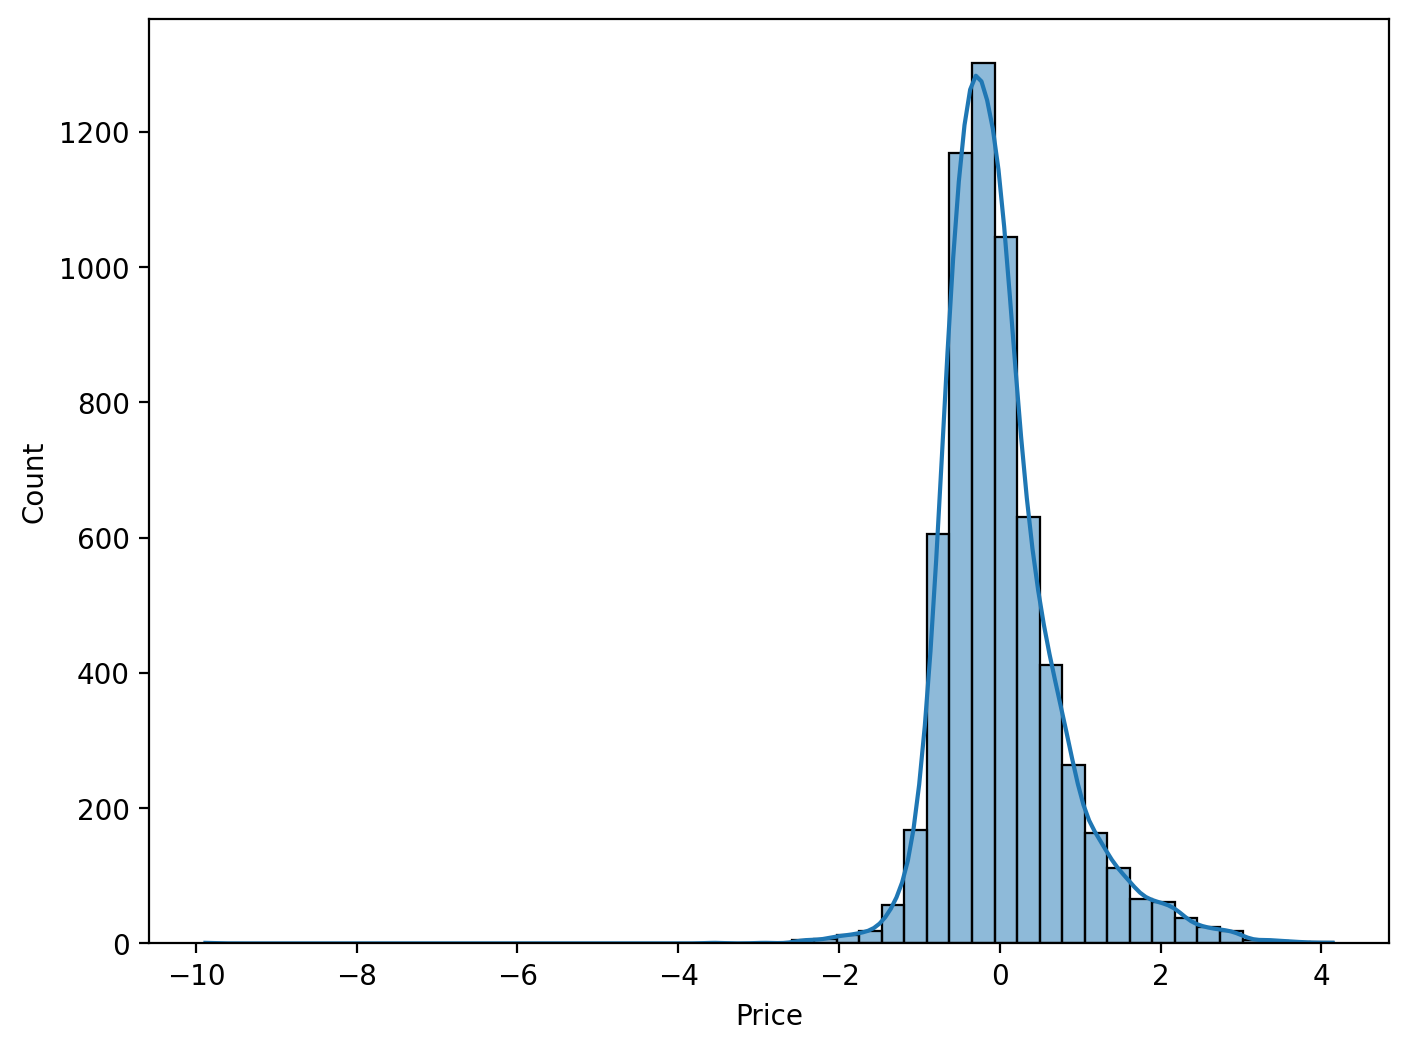

In [32]:
fig, ax = plt.subplots(figsize=(8,6), dpi=200)
sns.histplot(residuals, bins=50, kde=True, ax=ax)

# 7. Performance Metrics

In [33]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.5272474538305952
Mean Squared Error:  0.5305677824766752
Root Mean Squared Error:  0.7284008391515452


In [34]:
score = r2_score(y_test, y_pred)
print("R^2 Score: ", score)

R^2 Score:  0.5957702326061665


In [35]:
adjusted_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R^2 Score: ", adjusted_r2)

Adjusted R^2 Score:  0.5952472117200027


# 8. Model Backtesting

In [36]:
test = housing.data[0].reshape(1, -1)
test_scaled = std_scaler.transform(test)

c:\Users\alfan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
ln.predict(test_scaled)

array([4.14333441])

# 9. Save Model into Pickle File

In [42]:
# Save Standard Scaler variable using Pickle Library
current_dir = os.getcwd()
root_dir = os.path.dirname(current_dir)
model_folder = os.path.join(root_dir, "models")
os.makedirs(model_folder, exist_ok=True)

model_filename = os.path.join(model_folder, "standard_scaler.pkl")
with open(model_filename, "wb") as file:
    pickle.dump(std_scaler, file)

In [39]:
# Save Linear Regression Model using Pickle Library
current_dir = os.getcwd()
root_dir = os.path.dirname(current_dir)
model_folder = os.path.join(root_dir, "models")
os.makedirs(model_folder, exist_ok=True)

model_filename = os.path.join(model_folder, "california_housing_linear_regression_model.pkl")
with open(model_filename, "wb") as file:
    pickle.dump(ln, file)

In [40]:
# Load Linear Regression Model
model_filename = os.path.join(model_folder, "california_housing_linear_regression_model.pkl")
with open(model_filename, "rb") as file:
    ln_pickle = pickle.load(file)

In [41]:
ln_pickle.predict(test_scaled)

array([4.14333441])